# What is this Project?

This is my approach on the "Wine Dataset for Clustering". 

The objective here is to try and cluster wine samples into three different categories (more on that on the next section). 

This project consists in a jupyter notebook with complete EDA explanation.

Kaggle original link: https://www.kaggle.com/harrywang/wine-dataset-for-clustering

These are the contents of this project:

* Exploratory Data Analysis
* Clustering Modeling using PyCaret:
    * Model Selection
    * Metrics
    * Model Assign

Author: Augusto Gontijo </br> 
LinkedIn: https://www.linkedin.com/in/augusto-gontijo/?locale=en_US </br> 
GitHub: https://github.com/augusto-gontijo

# About the dataset

This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

More on the original link, here: https://www.kaggle.com/harrywang/wine-dataset-for-clustering

# Dependencies

This project was developed using:

* Python Version: 3.8.10
* Numpy version: 1.19.5
* Pandas version: 1.4.1
* SKLearn version: 0.23.2
* pycaret version: 2.3.9
* Seaborn version: 0.11.2
* matplotlib version: 3.5.1

(you might have trouble if trying to use different versions)

# Imports  

## Libraries

In [1]:
# Data manipulation libs
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np

# Machine Learining classification libs
from pycaret.clustering import *

# Data visualization libs
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")
sns.set_style('whitegrid')

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data

Importing the CSV file.

**Remember to alter the file path to the folder path on your computer**

In [5]:
data = pd.read_csv("C:/Users/Augusto/Documents/Portfólio/ML#4 - Wine Clustering/Data/wine-clustering.csv")

# Exploratory Data Analysis (EDA)

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

More on: https://en.wikipedia.org/wiki/Exploratory_data_analysis

## Understanding the Data

In this section we'll explore the raw data in order to understand it before modelling.

More on the official data here: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

### Data Overview

In [6]:
print("The 'data' dataset contains {} rows and {} columns.".format(data.shape[0], data.shape[1]))

The 'data' dataset contains 178 rows and 13 columns.


In [7]:
# Checking out the first 10 rows of the dataset

data.head(10)

Alcohol  Malic_Acid  Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71 2.43         15.60        127           2.80   
1    13.20        1.78 2.14         11.20        100           2.65   
2    13.16        2.36 2.67         18.60        101           2.80   
3    14.37        1.95 2.50         16.80        113           3.85   
4    13.24        2.59 2.87         21.00        118           2.80   
5    14.20        1.76 2.45         15.20        112           3.27   
6    14.39        1.87 2.45         14.60         96           2.50   
7    14.06        2.15 2.61         17.60        121           2.60   
8    14.83        1.64 2.17         14.00         97           2.80   
9    13.86        1.35 2.27         16.00         98           2.98   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  Hue  \
0        3.06                  0.28             2.29             5.64 1.04   
1        2.76                  0.26             1.28             4.38 1.05   
2        3.24                  0.30             2.81             5.68 1.03   
3        3.49                  0.24             2.18             7.80 0.86   
4        2.69                  0.39             1.82             4.32 1.04   
5        3.39                  0.34             1.97             6.75 1.05   
6        2.52                  0.30             1.98             5.25 1.02   
7        2.51                  0.31             1.25             5.05 1.06   
8        2.98                  0.29             1.98             5.20 1.08   
9        3.15                  0.22             1.85             7.22 1.01   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735  
5   2.85     1450  
6   3.58     1290  
7   3.58     1295  
8   2.85     1045  
9   3.55     1045

### Statistical Summary

In [8]:
data.describe()

Alcohol  Malic_Acid    Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
count   178.00      178.00 178.00        178.00     178.00         178.00   
mean     13.00        2.34   2.37         19.49      99.74           2.30   
std       0.81        1.12   0.27          3.34      14.28           0.63   
min      11.03        0.74   1.36         10.60      70.00           0.98   
25%      12.36        1.60   2.21         17.20      88.00           1.74   
50%      13.05        1.87   2.36         19.50      98.00           2.35   
75%      13.68        3.08   2.56         21.50     107.00           2.80   
max      14.83        5.80   3.23         30.00     162.00           3.88   

       Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
count      178.00                178.00           178.00           178.00   
mean         2.03                  0.36             1.59             5.06   
std          1.00                  0.12             0.57             2.32   
min          0.34                  0.13             0.41             1.28   
25%          1.20                  0.27             1.25             3.22   
50%          2.13                  0.34             1.56             4.69   
75%          2.88                  0.44             1.95             6.20   
max          5.08                  0.66             3.58            13.00   

         Hue  OD280  Proline  
count 178.00 178.00   178.00  
mean    0.96   2.61   746.89  
std     0.23   0.71   314.91  
min     0.48   1.27   278.00  
25%     0.78   1.94   500.50  
50%     0.96   2.78   673.50  
75%     1.12   3.17   985.00  
max     1.71   4.00  1680.00

### Missing Data

In [9]:
# Checking for NA (not available) data.

data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

### Data Types

In [10]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

## Analyzing the Data

A correlation matrix is a table showing correlation coefficients between variables. 

Each cell in the table shows the correlation between two variables

<AxesSubplot:>

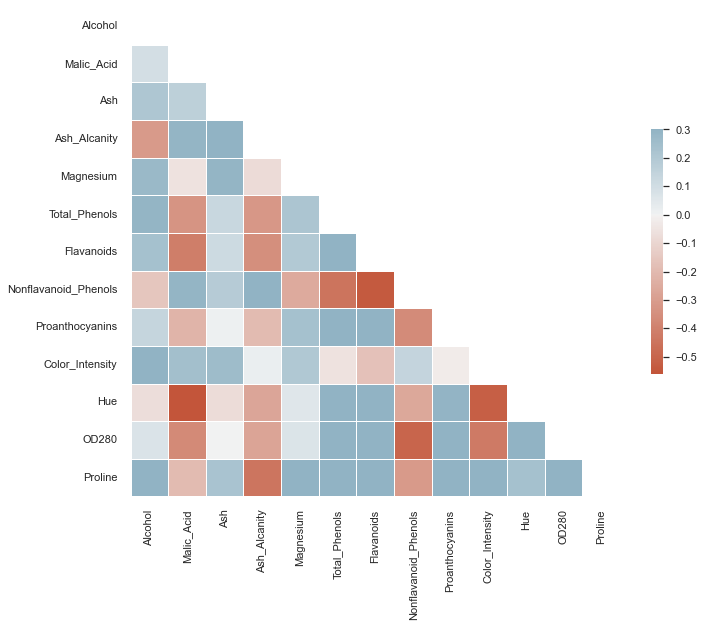

In [11]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In the matrix above, the correlation value can vary between -1 (negative correlation), 0 (no correlation) and 1 (positive correlation).

Some observations:

* We can observe a relevant negative correlation between 'Malic_Acid' and 'Hue'.
* We can observe a relevant negative correlation between 'Flavonoids' and 'Nonflavonoid_Phenols'.

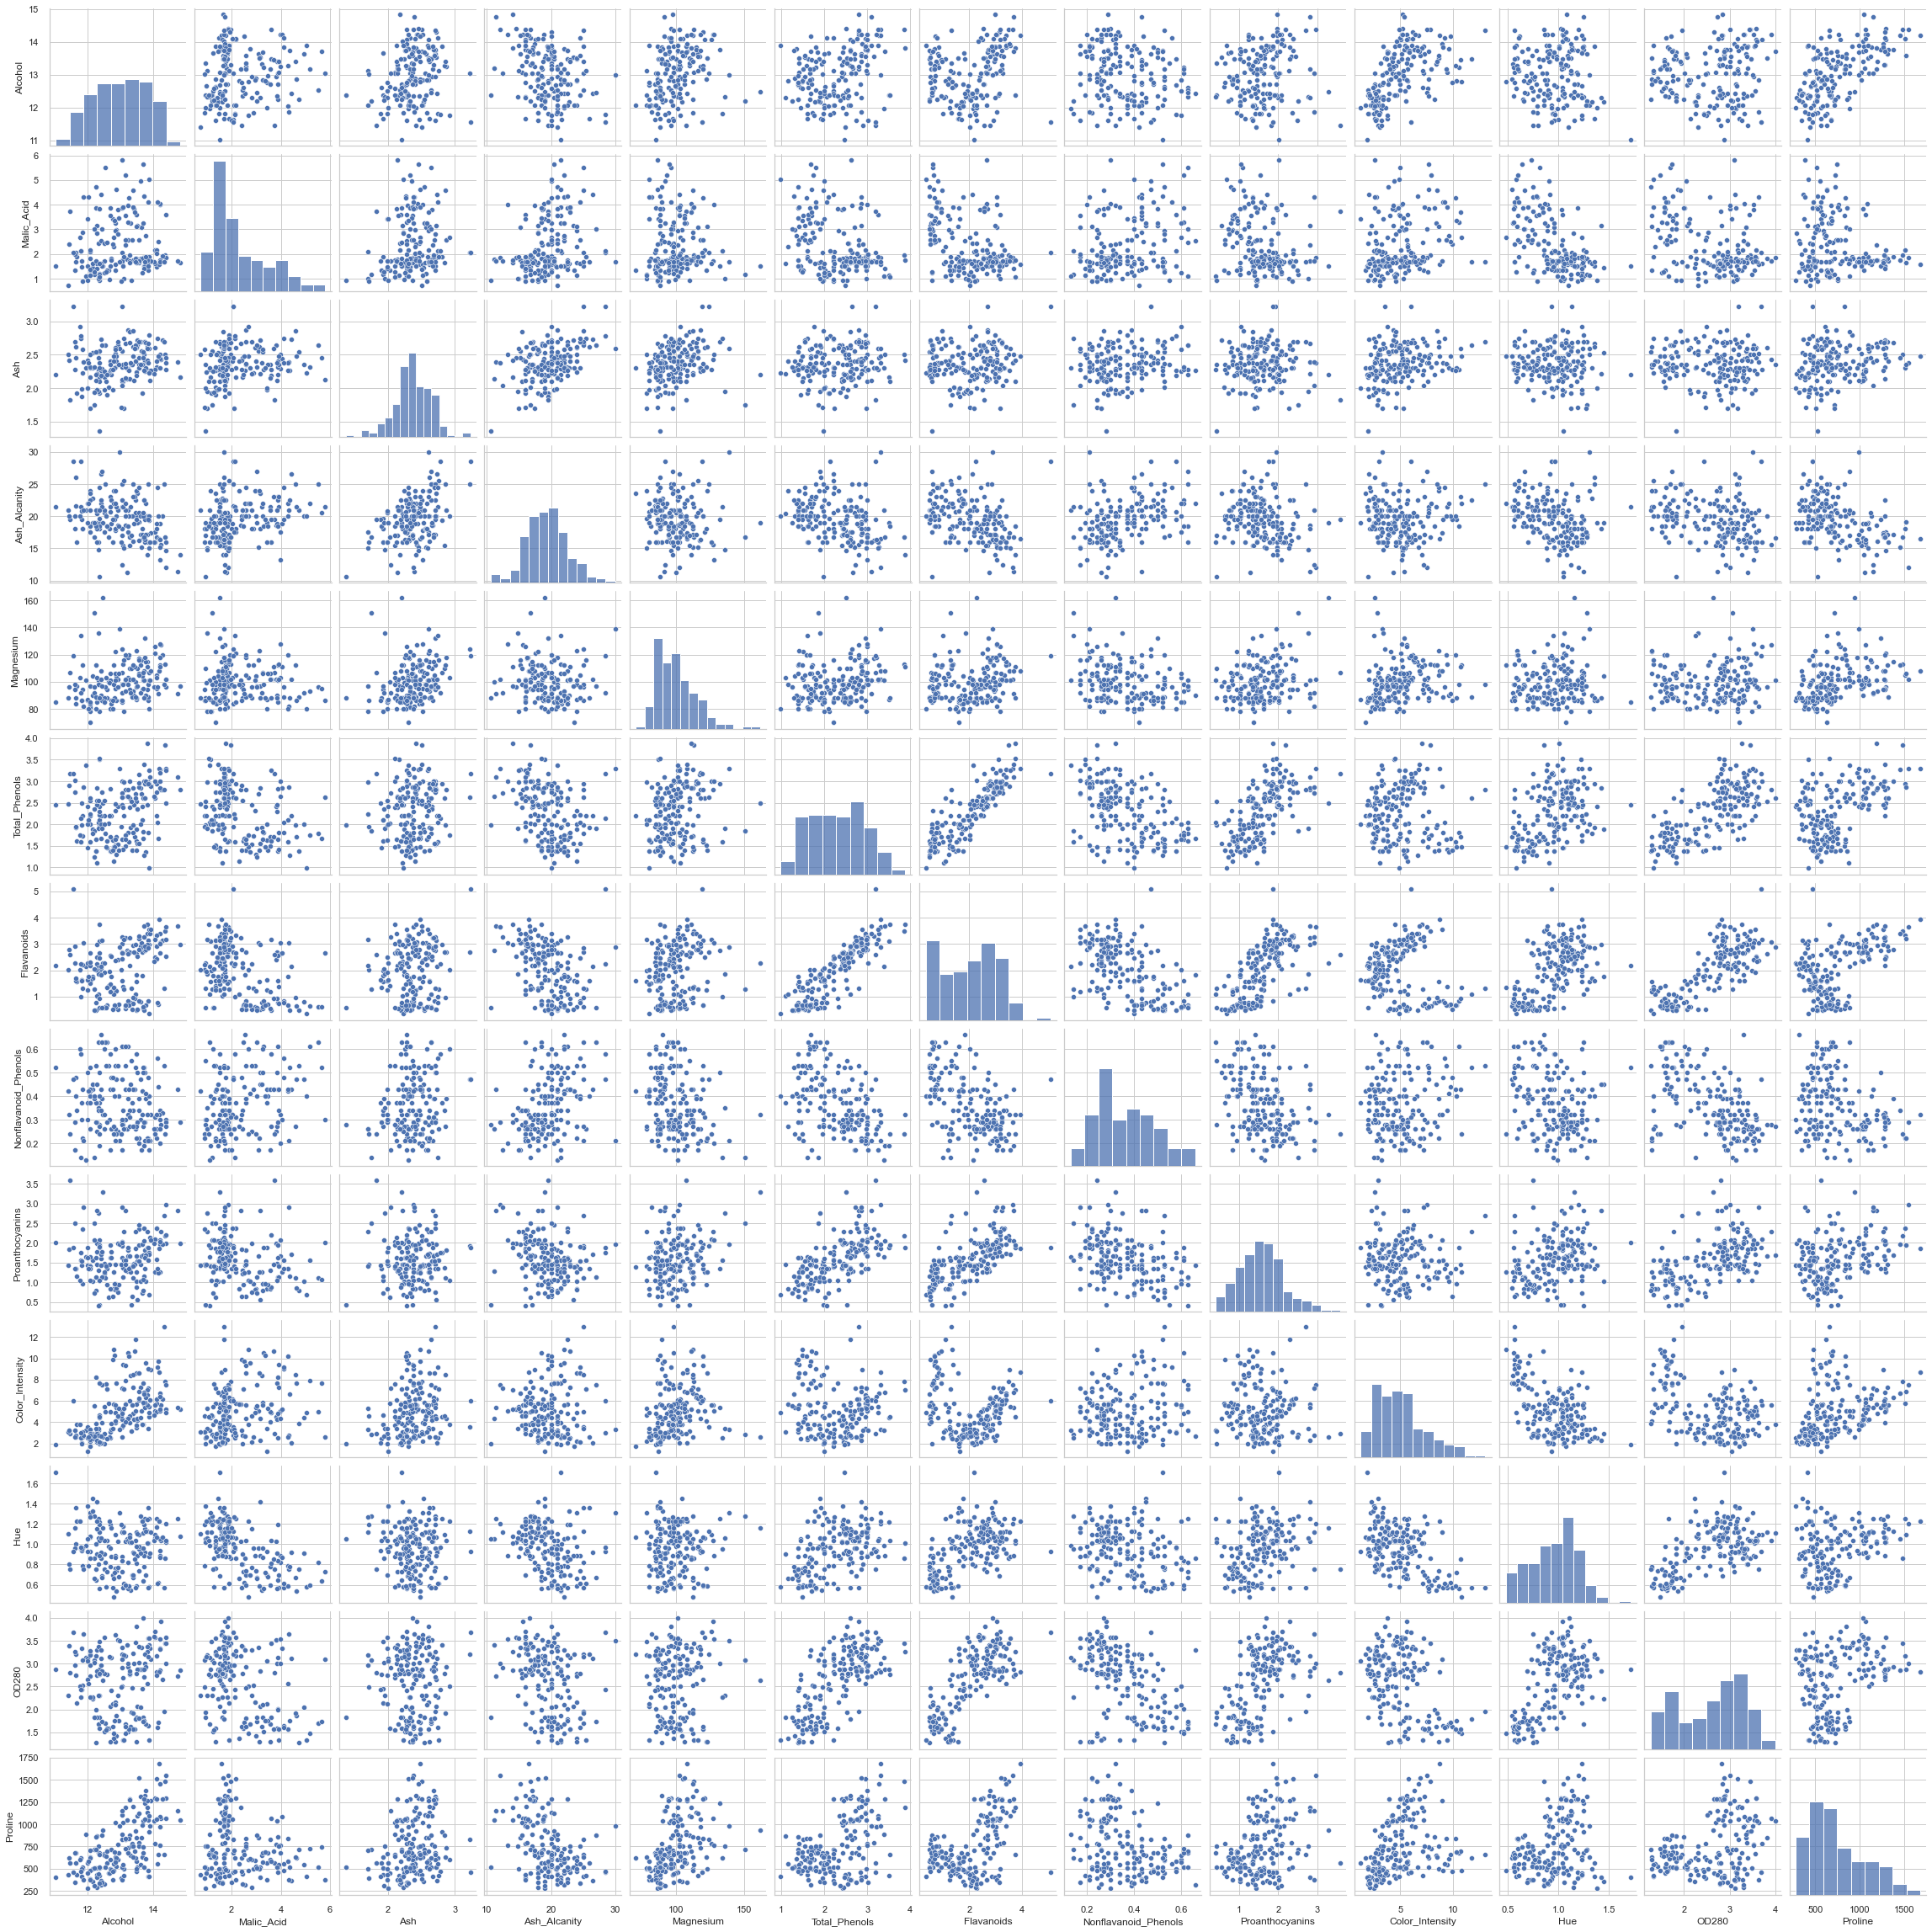

In [42]:
sns.pairplot(data)

On the pairplot above we can observe a scatter distribution bewteen each variable.

# Modeling

## PyCaret

In this project, we'll use PyCaret for the modeling.

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

More about PyCaret on: https://pycaret.gitbook.io/docs/

I strongly suggest that you consult the official PyCaret Clustering docs here: https://pycaret.readthedocs.io/en/latest/api/clustering.html#

### Setup

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes one mandatory parameter: data. All the other parameters are optional.

In [12]:
s = setup(data, 
          normalize = True)

### Creating the Model

This function trains and evaluates the performance of a given model. Metrics evaluated can be accessed using the get_metrics function. Custom metrics can be added or removed using the add_metric and remove_metric function. All the available models can be accessed using the models function.

In [13]:
kmeans = create_model('kmeans',
                     num_clusters = 3)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0        0.28              70.94            1.39            0           0   

   Completeness  
0             0

In [14]:
birch = create_model('birch',
                     num_clusters = 3)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0        0.28              67.65            1.42            0           0   

   Completeness  
0             0

### Evaluate Model

This function displays a user interface for analyzing performance of a trained model. It calls the plot_model function internally.

In a real project, this function would be great, for its interactivity. But, for this project we'll use the 'plot_model' function to plot each performance analysis individually.

In [ ]:
 # evaluate_model(kmeans)

### Plot Model

This function analyzes the performance of a trained model.

#### Silhouette

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified. It was proposed by Belgian statistician Peter Rousseeuw in 1987.

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

Source: https://en.wikipedia.org/wiki/Silhouette_(clustering)

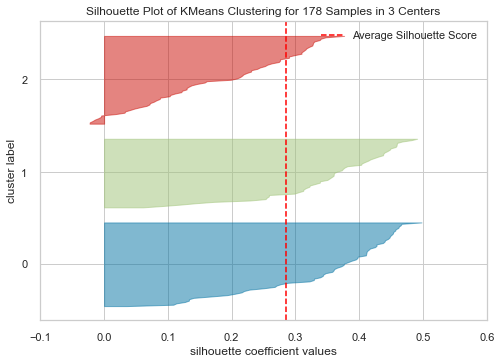

In [16]:
plot_model(kmeans, plot = 'silhouette')

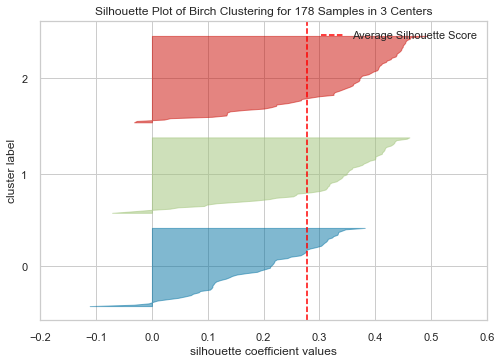

In [18]:
plot_model(birch, plot = 'silhouette')

On the silhouette analysis above, we can observe a similar behavior. The average silhouette scores for both models are very similar, around 0.28.

#### Elbow

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.

The method can be traced to speculation by Robert L. Thorndike in 1953.

Source: https://en.wikipedia.org/wiki/Elbow_method_(clustering)

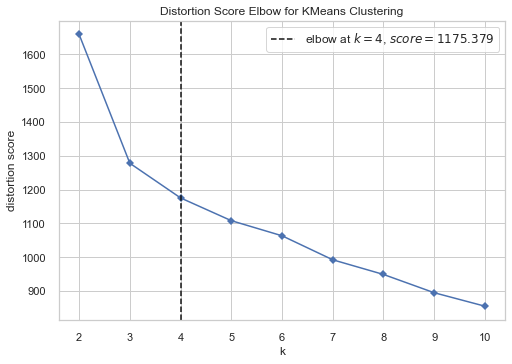

In [15]:
plot_model(kmeans, plot = 'elbow')

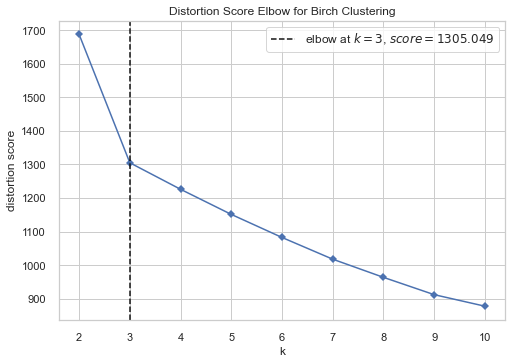

In [17]:
plot_model(birch, plot = 'elbow')

On the Elbow analysis above, curiously, the 'K-means' model indicated that the ideal number of clusters would be 4. This is not true, as we know from the official dataset documentation that the samples were extracted from **three** different cultivars.

### Assign Model

This function assigns cluster labels to the dataset for a given model.

#### K-Means

In [19]:
result_k = assign_model(kmeans)

resultC = pd.DataFrame(result_k['Cluster'])

resultC['Count'] = 1
resultC.groupby(by = 'Cluster').count()

Count
Cluster         
Cluster 0     62
Cluster 1     51
Cluster 2     65

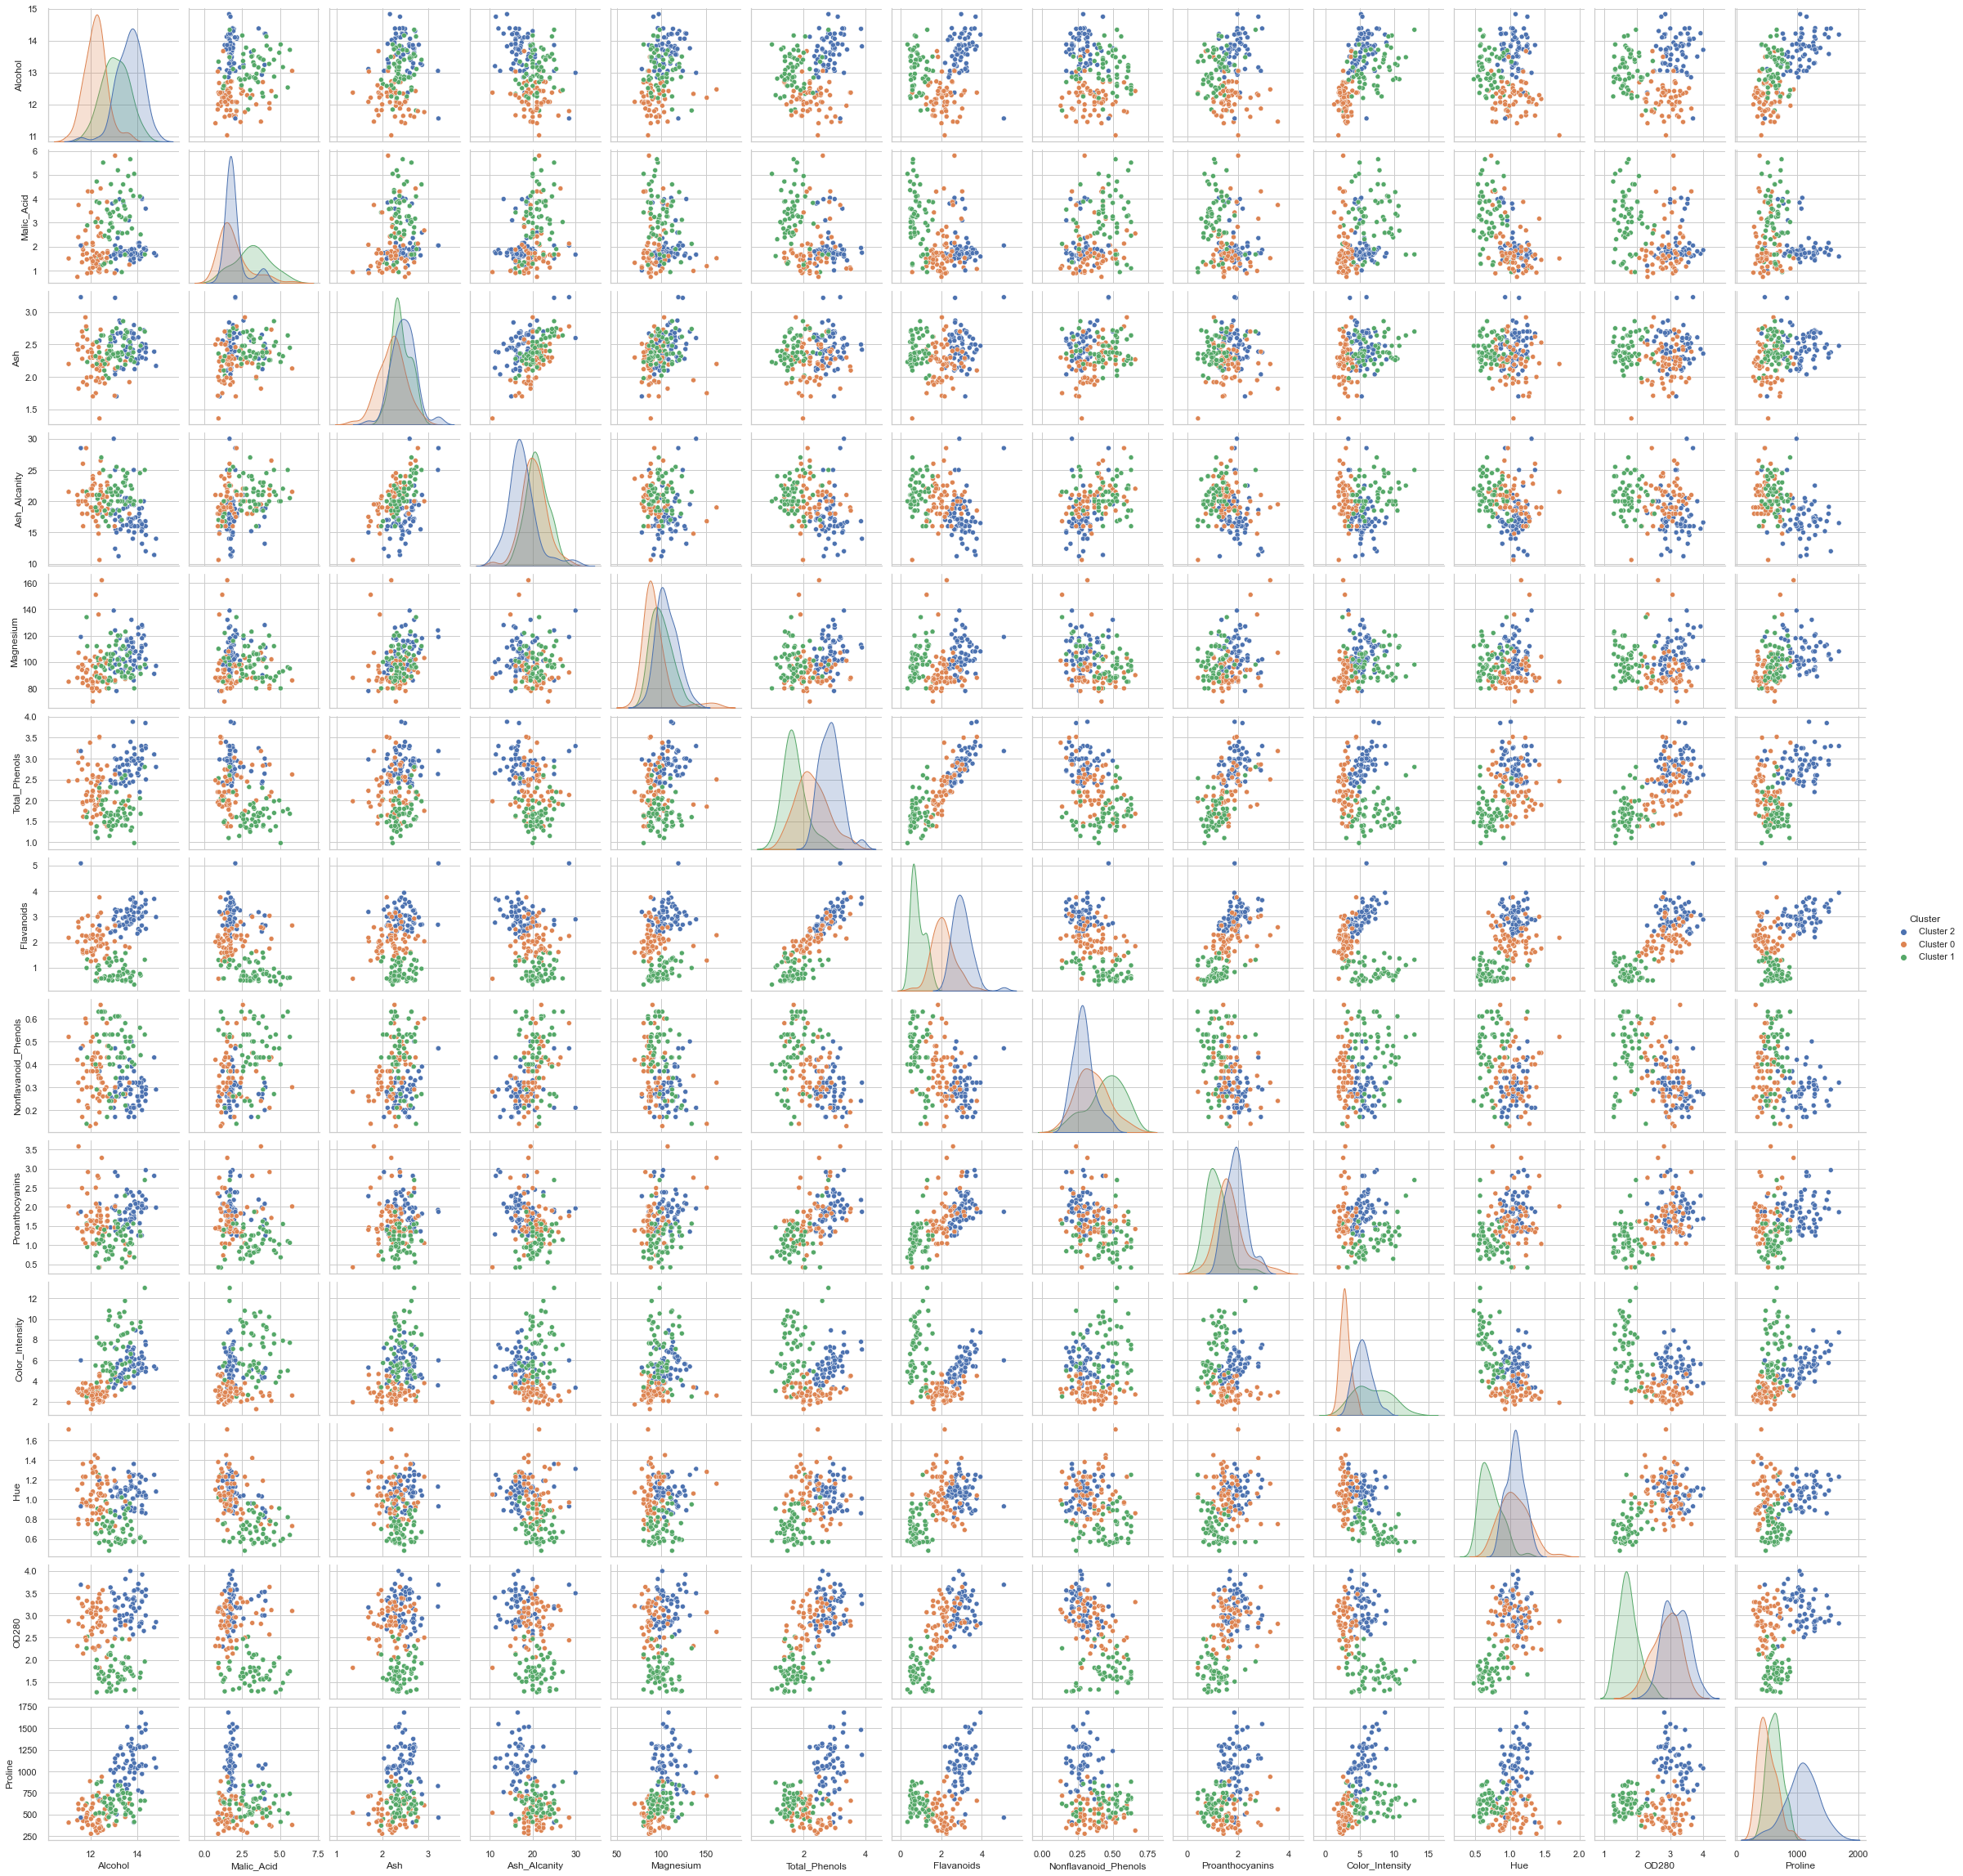

In [21]:
sns.pairplot(result_k, hue = 'Cluster')

#### Birch

In [23]:
result_b = assign_model(birch)

resultC = pd.DataFrame(result_b['Cluster'])

resultC['Count'] = 1
resultC.groupby(by = 'Cluster').count()

Count
Cluster         
Cluster 0     58
Cluster 1     56
Cluster 2     64

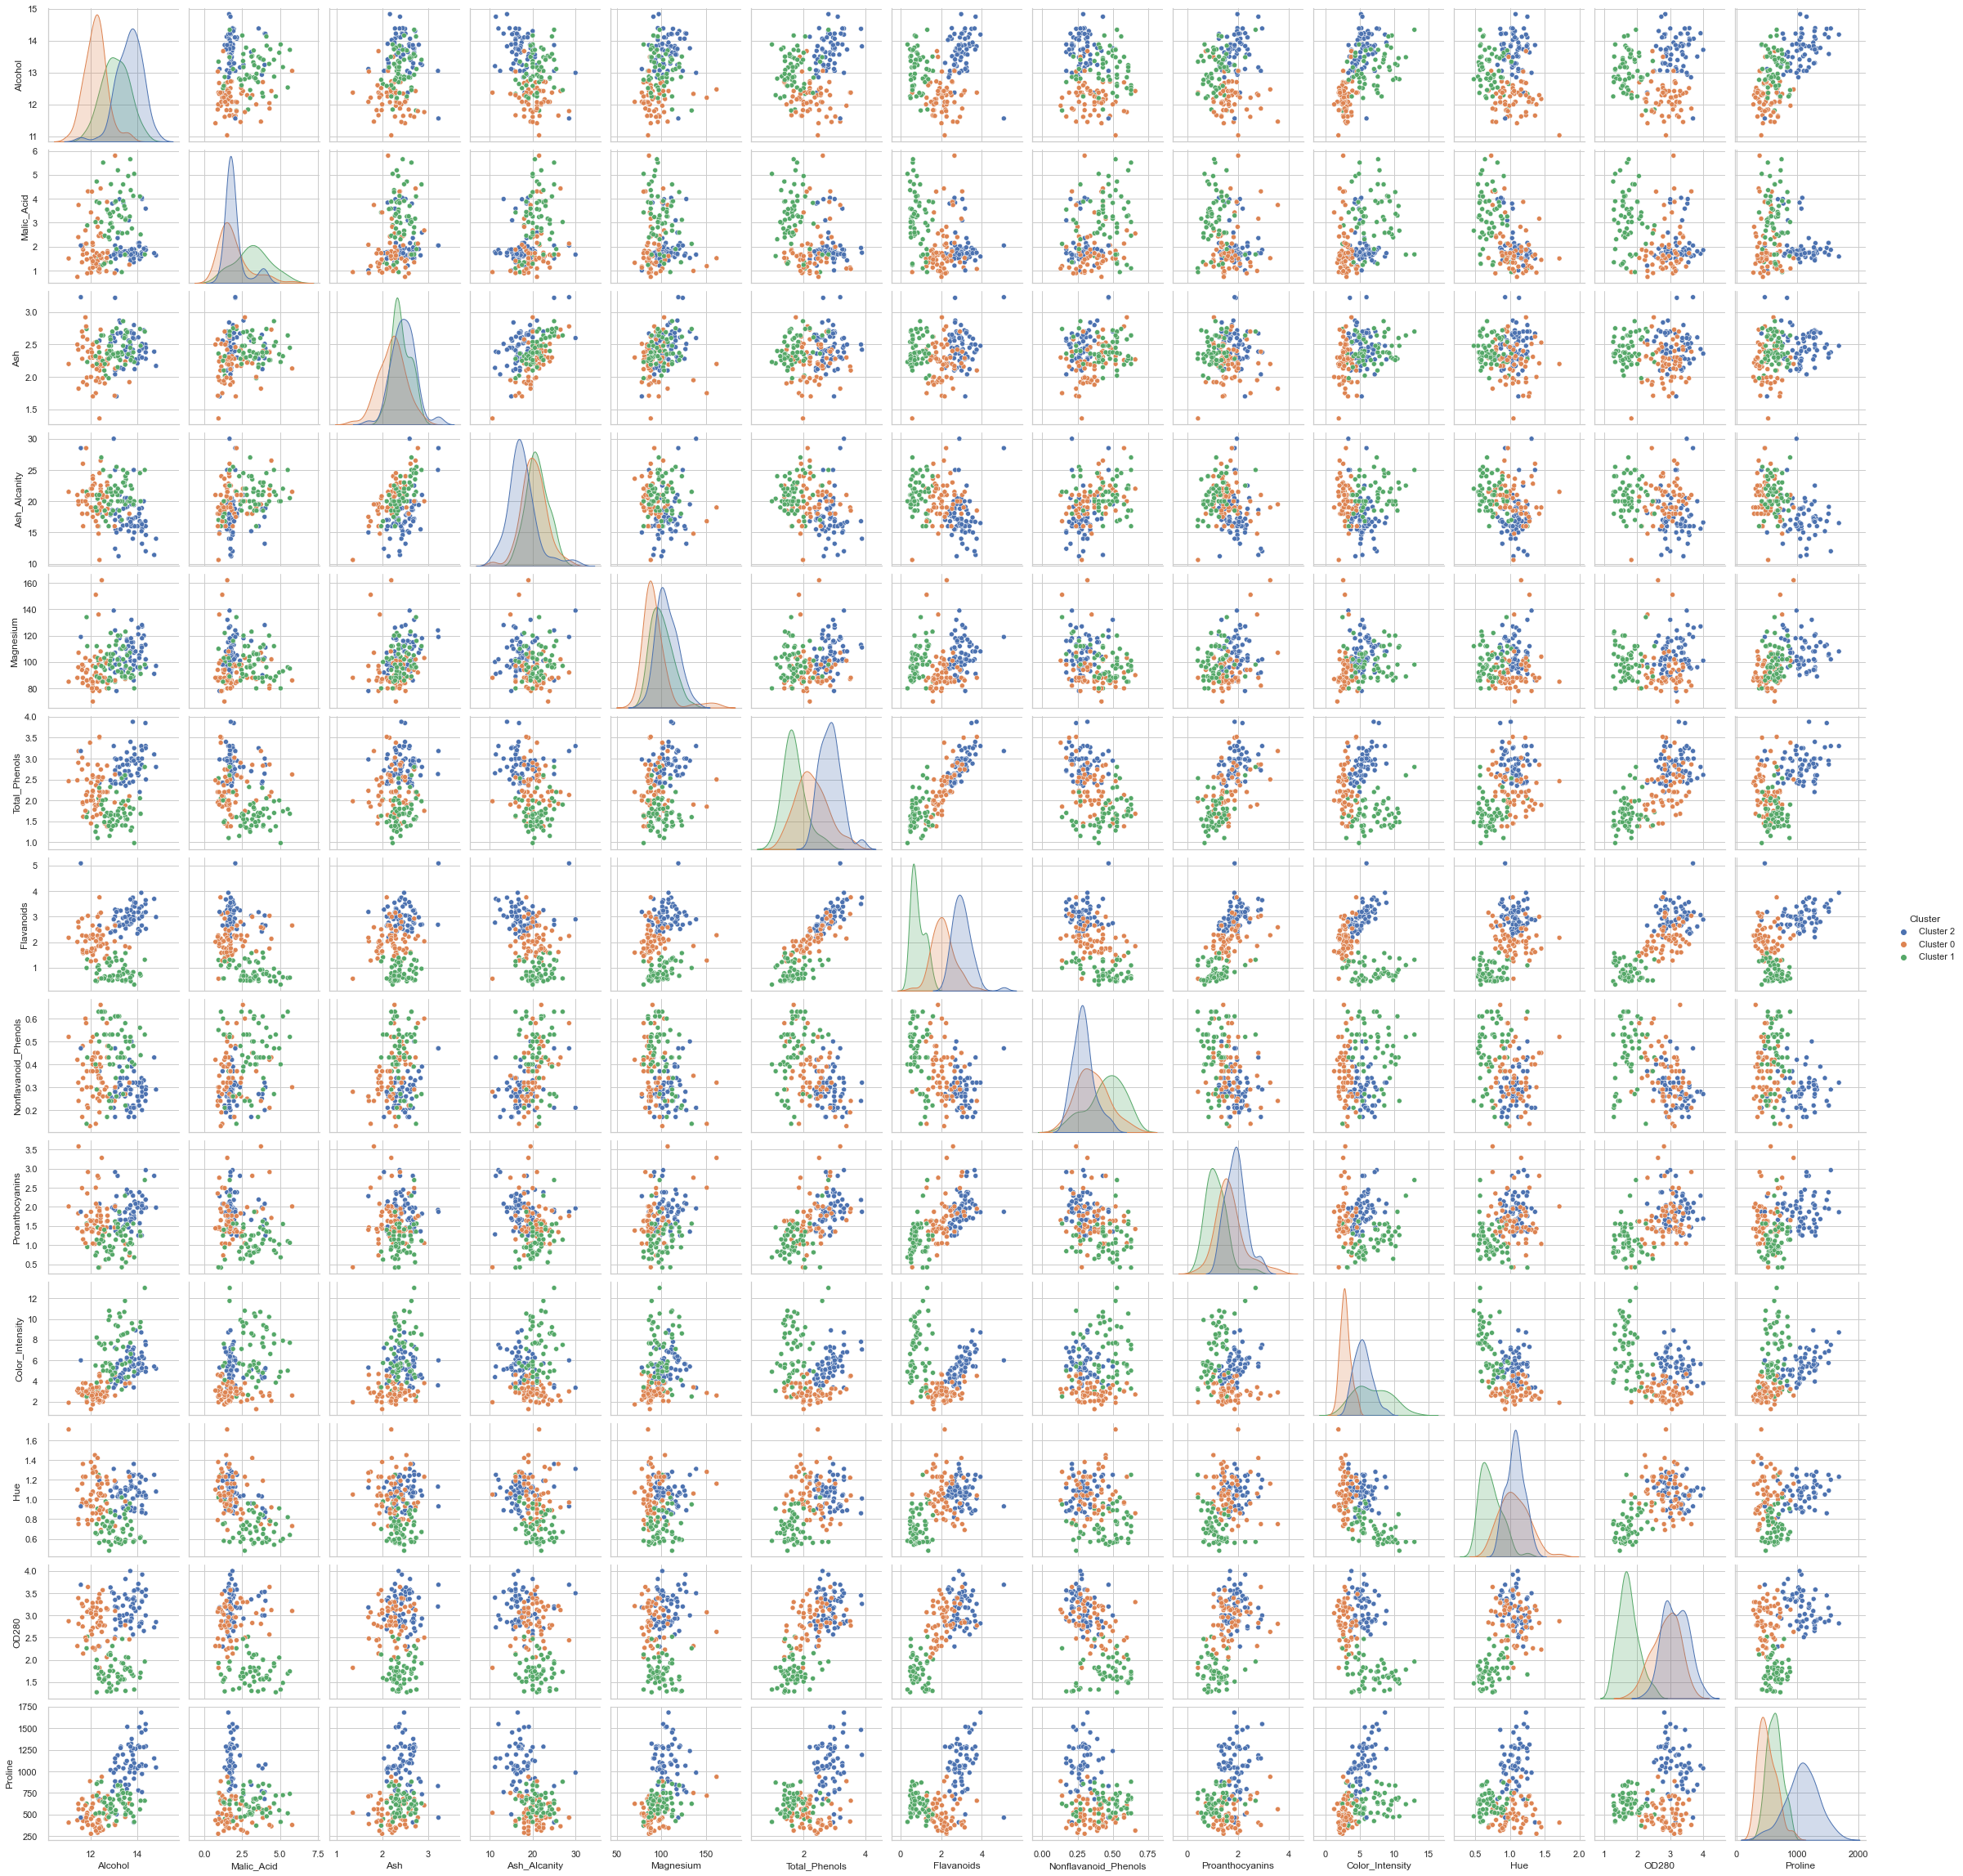

In [25]:
sns.pairplot(result_b, hue = 'Cluster')

# Final Thoughts

On this project we could easily set up the PyCaret library for unsupervised clustering modeling. We observed that the 'K-Means' and 'Birch' algorithms delireved similar results and visualized the final results.